## SetUp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
complaints_df = pd.read_csv("BIC_Complaints_Inquiries_20250612.csv")
violations_df = pd.read_csv("BIC_Issued_Violations_20250612.csv")

# Optional: Set a consistent style
sns.set(style="whitegrid")

## Repeat Offenders

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/1688635635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='Reds_r')


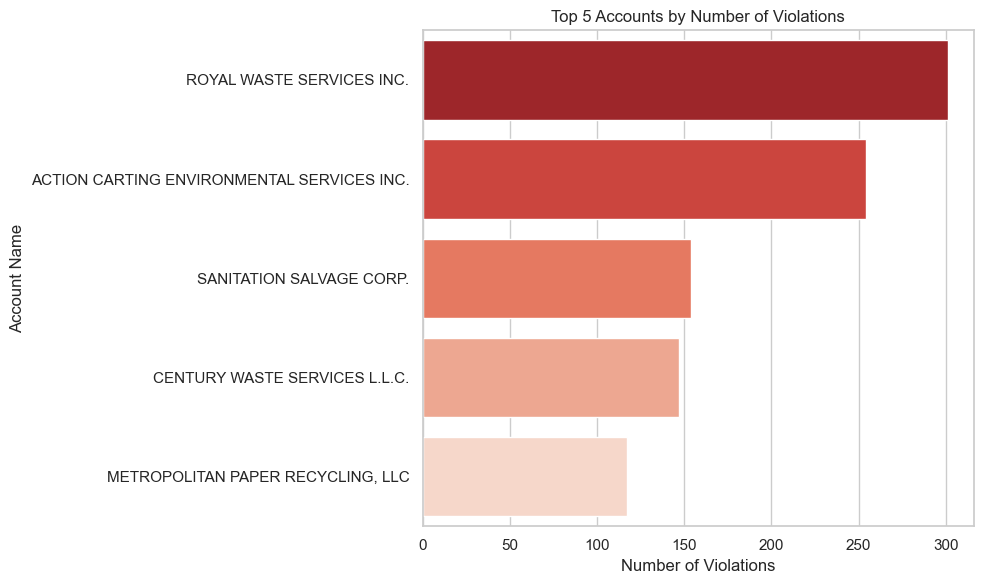

In [2]:
# Top 5 accounts with most violations
top_accounts = violations_df['ACCOUNT NAME'].value_counts().head(5)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='Reds_r')
plt.title("Top 5 Accounts by Number of Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Account Name")
plt.tight_layout()
plt.show()

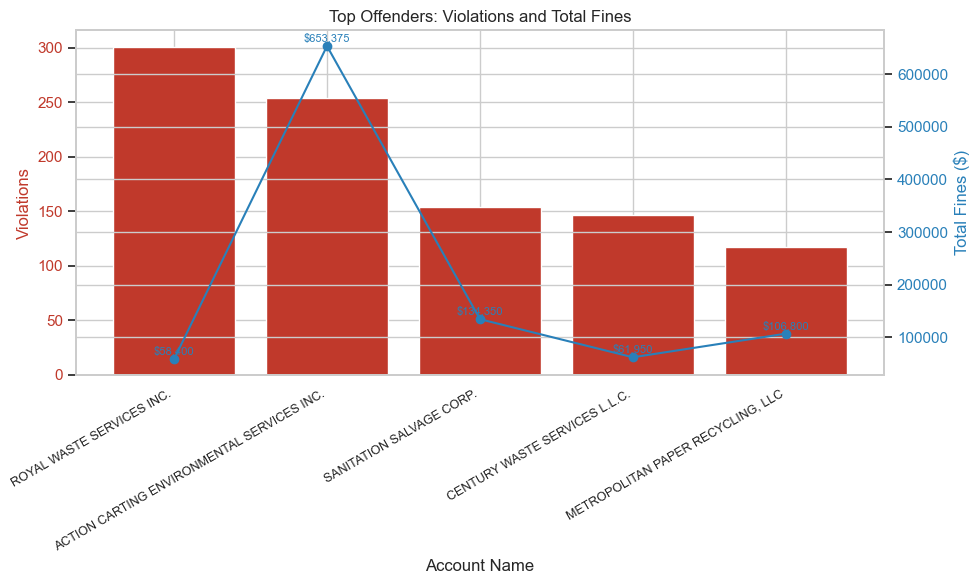

In [8]:
# Extract top 5 accounts
top_accounts = violations_df['ACCOUNT NAME'].value_counts().head(5)
top_fines = violations_df[violations_df['ACCOUNT NAME'].isin(top_accounts.index)]
fine_totals = top_fines.groupby('ACCOUNT NAME')['FINE AMOUNT'].sum()
fine_totals = fine_totals.reindex(top_accounts.index)  # ensure matching order

# Create the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for violations
color = '#c0392b'
ax1.bar(top_accounts.index, top_accounts.values, color=color, label='Violations')
ax1.set_ylabel('Violations', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel("Account Name")
ax1.set_title("Top Offenders: Violations and Total Fines")

# Rotate x labels
plt.xticks(rotation=30, ha='right', fontsize=9)

# Line chart for fines
ax2 = ax1.twinx()
color = '#2980b9'
ax2.plot(top_accounts.index, fine_totals.values, color=color, marker='o', label='Total Fines')
ax2.set_ylabel('Total Fines ($)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add data labels to points
for i, val in enumerate(fine_totals.values):
    ax2.text(i, val + 5000, f"${int(val):,}", ha='center', va='bottom', fontsize=8, color=color)

plt.tight_layout()
plt.show()

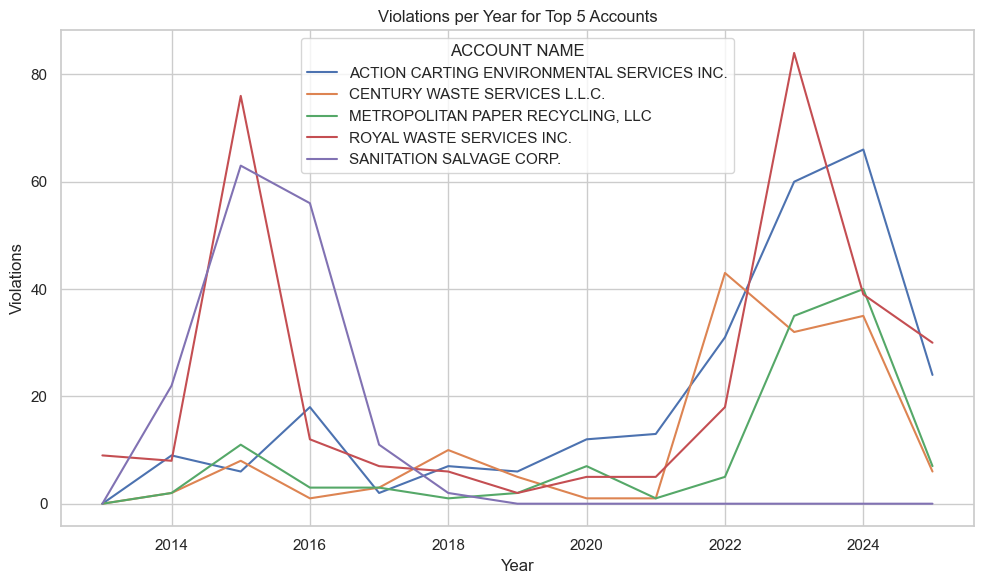

In [16]:
violations_df['Year'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce').dt.year
top_violators = top_accounts.index.tolist()

trend = violations_df[violations_df['ACCOUNT NAME'].isin(top_violators)]
trend = trend.groupby(['ACCOUNT NAME', 'Year']).size().unstack().fillna(0).T

trend.plot(kind='line', figsize=(10, 6))
plt.title("Violations per Year for Top 5 Accounts")
plt.xlabel("Year")
plt.ylabel("Violations")
plt.tight_layout()
plt.show()

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/2311440675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trend['Quarter'] = monthly_trend['Month'].dt.to_timestamp().dt.to_period("Q").dt.to_timestamp()


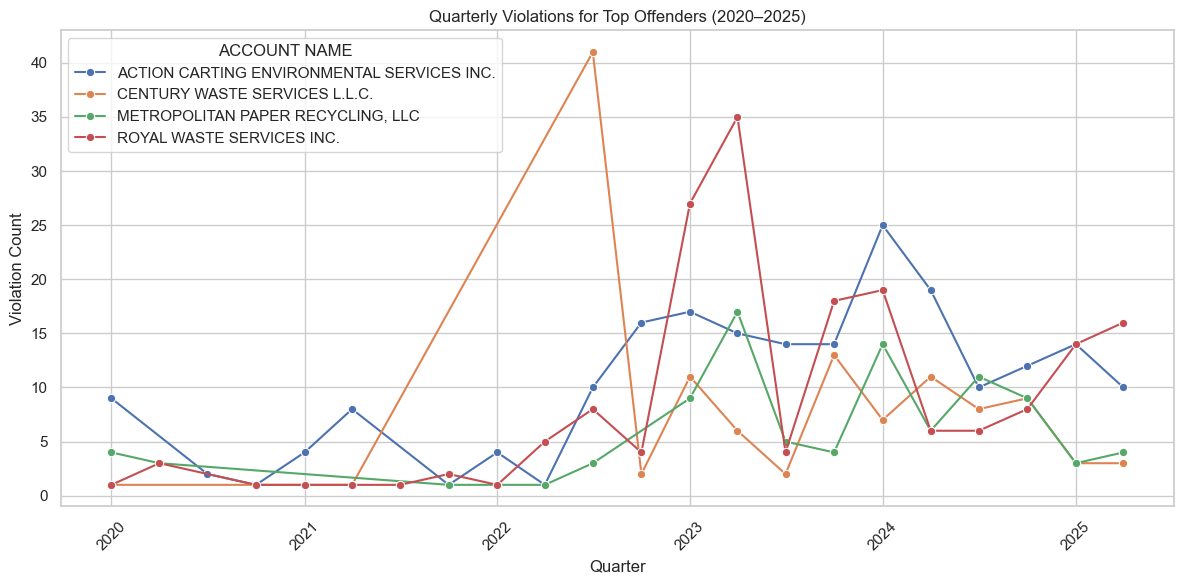

In [26]:
# Convert violation dates to quarterly
monthly_trend['Quarter'] = monthly_trend['Month'].dt.to_timestamp().dt.to_period("Q").dt.to_timestamp()

# Filter to recent quarters (e.g. 2020 and after)
recent_quarters = monthly_trend[monthly_trend['Quarter'] >= '2020-01-01']

# Group by account and quarter
quarterly_counts = (
    recent_quarters.groupby(['ACCOUNT NAME', 'Quarter'])
    .size()
    .reset_index(name='Violation Count')
)

# Optional: rolling average for smoothing (uncomment to use)
quarterly_counts['Smoothed'] = (
     quarterly_counts.groupby('ACCOUNT NAME')['Violation Count']
     .transform(lambda x: x.rolling(window=2, min_periods=1).mean())
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_counts, x='Quarter', y='Violation Count', hue='ACCOUNT NAME', marker='o')

# Optional: add a policy marker
#plt.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle='--', label='2023 Policy Marker')

plt.xticks(rotation=45)
plt.title("Quarterly Violations for Top Offenders (2020–2025)")
plt.xlabel("Quarter")
plt.ylabel("Violation Count")
plt.legend(title='ACCOUNT NAME')
plt.tight_layout()
plt.show()

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/1013668497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trend['Quarter'] = monthly_trend['Month'].dt.to_timestamp().dt.to_period("Q").dt.to_timestamp()


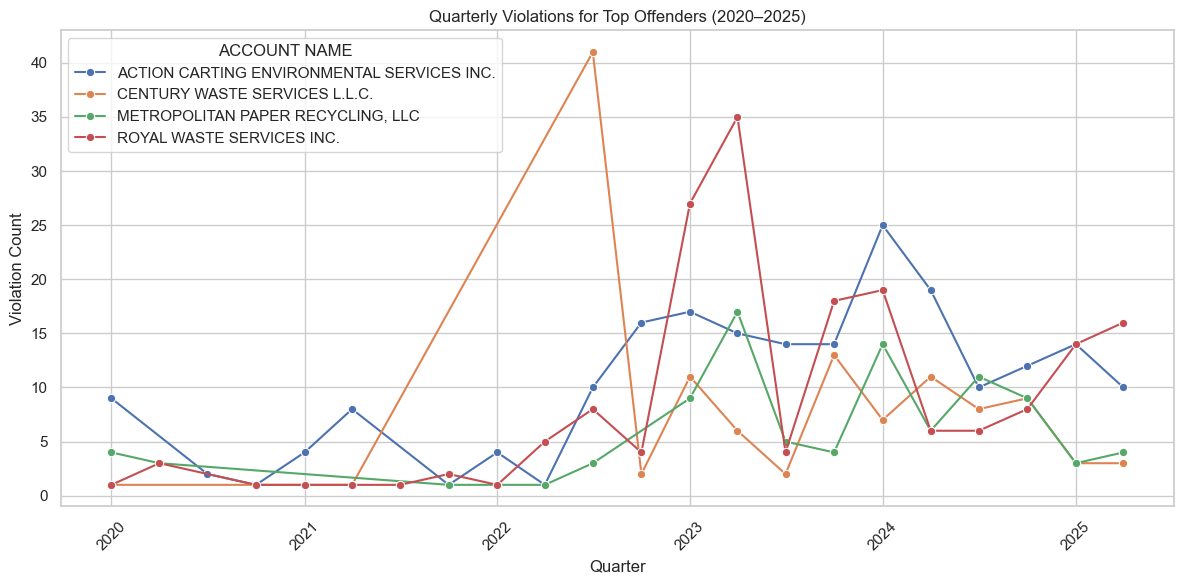

In [27]:
# Convert violation dates to quarterly
monthly_trend['Quarter'] = monthly_trend['Month'].dt.to_timestamp().dt.to_period("Q").dt.to_timestamp()

# Filter to recent quarters (e.g. 2020 and after)
recent_quarters = monthly_trend[monthly_trend['Quarter'] >= '2020-01-01']

# Group by account and quarter
quarterly_counts = (
    recent_quarters.groupby(['ACCOUNT NAME', 'Quarter'])
    .size()
    .reset_index(name='Violation Count')
)

# Optional: rolling average for smoothing (uncomment to use)
#quarterly_counts['Smoothed'] = (
#     quarterly_counts.groupby('ACCOUNT NAME')['Violation Count']
 #    .transform(lambda x: x.rolling(window=2, min_periods=1).mean())
#)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_counts, x='Quarter', y='Violation Count', hue='ACCOUNT NAME', marker='o')

# Optional: add a policy marker
#plt.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle='--', label='2023 Policy Marker')

plt.xticks(rotation=45)
plt.title("Quarterly Violations for Top Offenders (2020–2025)")
plt.xlabel("Quarter")
plt.ylabel("Violation Count")
plt.legend(title='ACCOUNT NAME')
plt.tight_layout()
plt.show()

## Geographic Hotspots

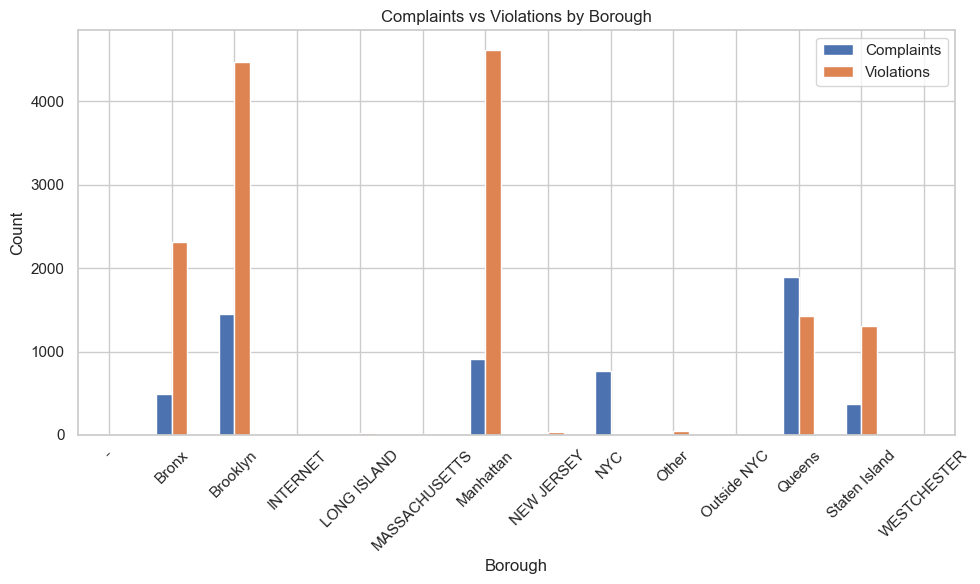

In [3]:
# Aggregate by borough
complaints_by_borough = complaints_df['COMPLAINT/INQUIRY BOROUGH'].value_counts()
violations_by_borough = violations_df['BOROUGH OF VIOLATION'].value_counts()

# Combine
borough_comparison = pd.DataFrame({
    'Complaints': complaints_by_borough,
    'Violations': violations_by_borough
}).fillna(0).astype(int)

# Bar chart
borough_comparison.plot(kind='bar', figsize=(10, 6))
plt.title("Complaints vs Violations by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

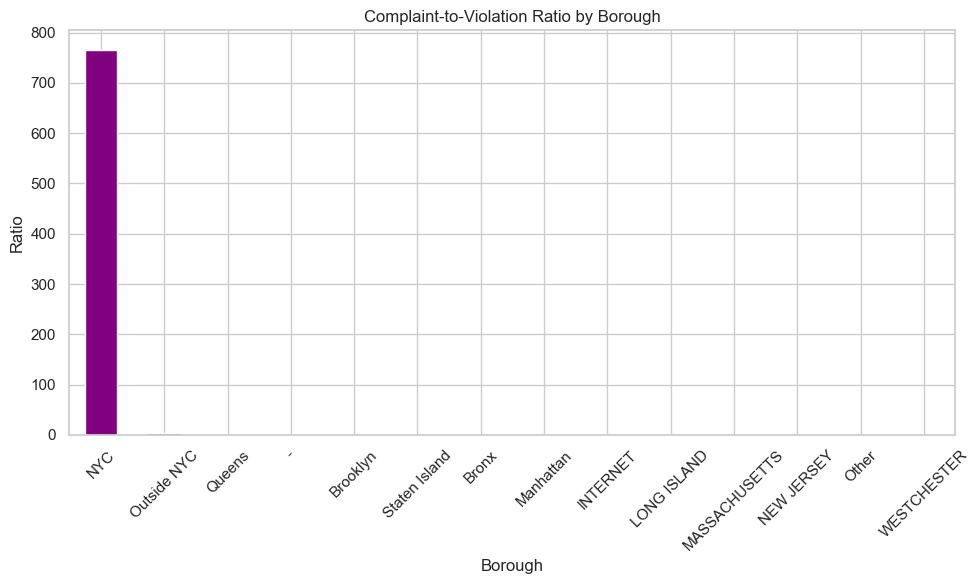

In [9]:
# Add a ratio column
borough_comparison['Complaint-to-Violation Ratio'] = borough_comparison['Complaints'] / borough_comparison['Violations'].replace(0, 1)

# Bar plot of the ratio
borough_comparison['Complaint-to-Violation Ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Complaint-to-Violation Ratio by Borough")
plt.ylabel("Ratio")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time to Resolution

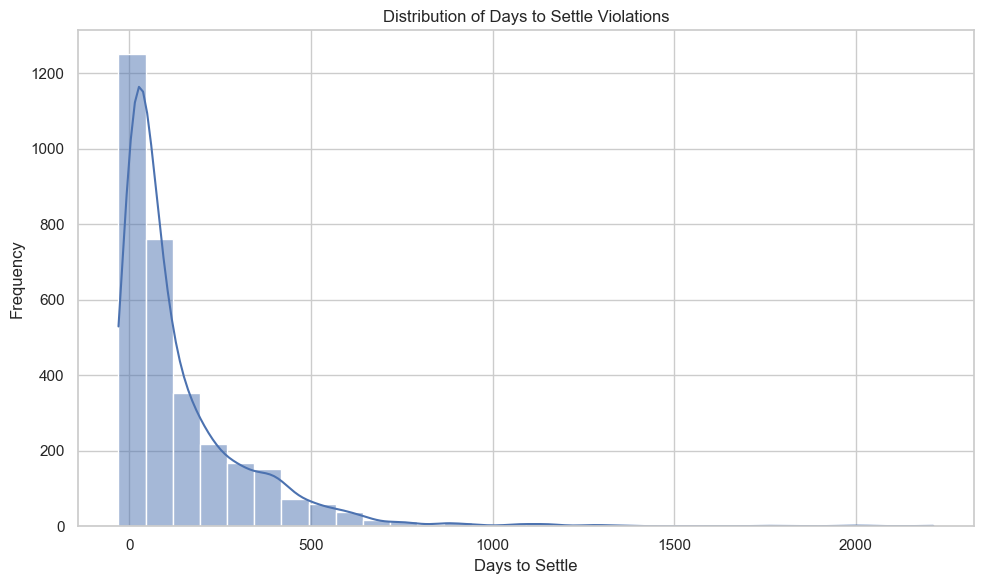

In [4]:
# Convert and strip timezone info
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(
    violations_df['DATE VIOLATION ISSUED'], errors='coerce'
).dt.tz_localize(None)

violations_df['SETTLEMENT DATE'] = pd.to_datetime(
    violations_df['SETTLEMENT DATE'], errors='coerce'
).dt.tz_localize(None)

# Calculate days to settle
violations_df['DAYS_TO_SETTLE'] = (
    violations_df['SETTLEMENT DATE'] - violations_df['DATE VIOLATION ISSUED']
).dt.days

resolved_violations = violations_df.dropna(subset=['DAYS_TO_SETTLE'])

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(resolved_violations['DAYS_TO_SETTLE'], bins=30, kde=True)
plt.title("Distribution of Days to Settle Violations")
plt.xlabel("Days to Settle")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
print("Resolution Time Summary:")
print(resolved_violations['DAYS_TO_SETTLE'].describe())

Resolution Time Summary:
count    3132.000000
mean      138.466794
std       188.605753
min       -30.000000
25%        21.000000
50%        71.000000
75%       188.000000
max      2213.000000
Name: DAYS_TO_SETTLE, dtype: float64


/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/2125919199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_violations['Resolved within 90 days'] = resolved_violations['DAYS_TO_SETTLE'] <= 90


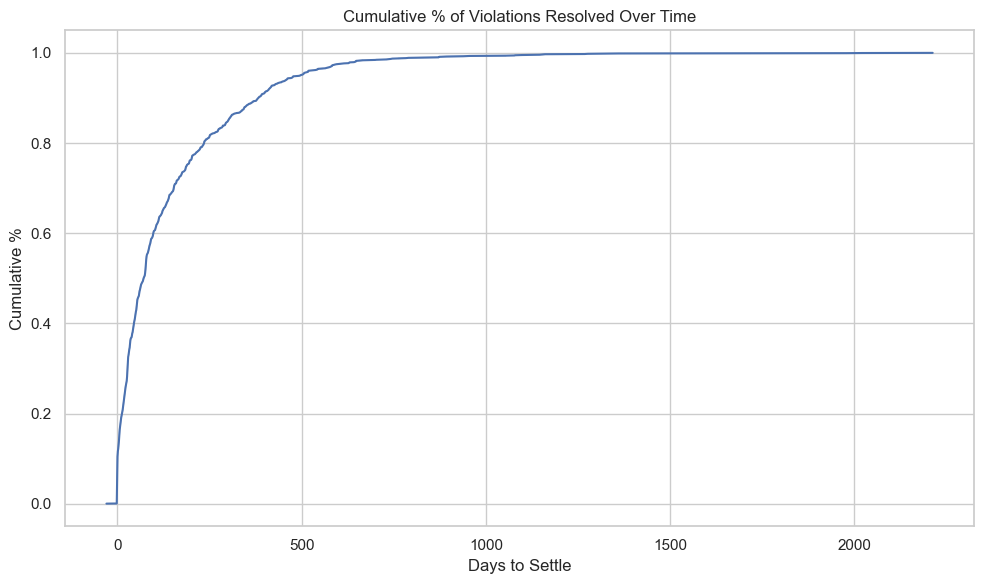

In [18]:
resolved_violations['Resolved within 90 days'] = resolved_violations['DAYS_TO_SETTLE'] <= 90
resolution_curve = resolved_violations['DAYS_TO_SETTLE'].sort_values().reset_index(drop=True)
cumulative = resolution_curve.rank(pct=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x=resolution_curve, y=cumulative)
plt.title("Cumulative % of Violations Resolved Over Time")
plt.xlabel("Days to Settle")
plt.ylabel("Cumulative %")
plt.tight_layout()
plt.show()

## Financial Impact

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/1403584947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_fines.values, y=total_fines.index, palette='Blues_r')


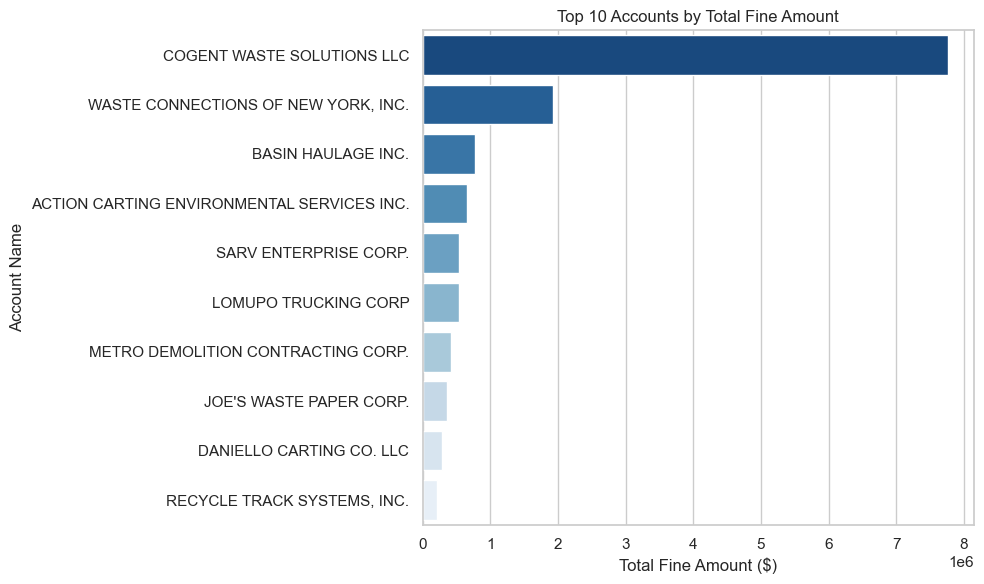

In [5]:
# Total fine amount by account
total_fines = violations_df.groupby('ACCOUNT NAME')['FINE AMOUNT'].sum().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_fines.values, y=total_fines.index, palette='Blues_r')
plt.title("Top 10 Accounts by Total Fine Amount")
plt.xlabel("Total Fine Amount ($)")
plt.ylabel("Account Name")
plt.tight_layout()
plt.show()

/var/folders/t1/030kx8pn0gvf37kb0sgdpk0r0000gp/T/ipykernel_80332/3273733958.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_fine['Avg Fine per Violation'], y=top_avg_fine.index, palette='coolwarm')


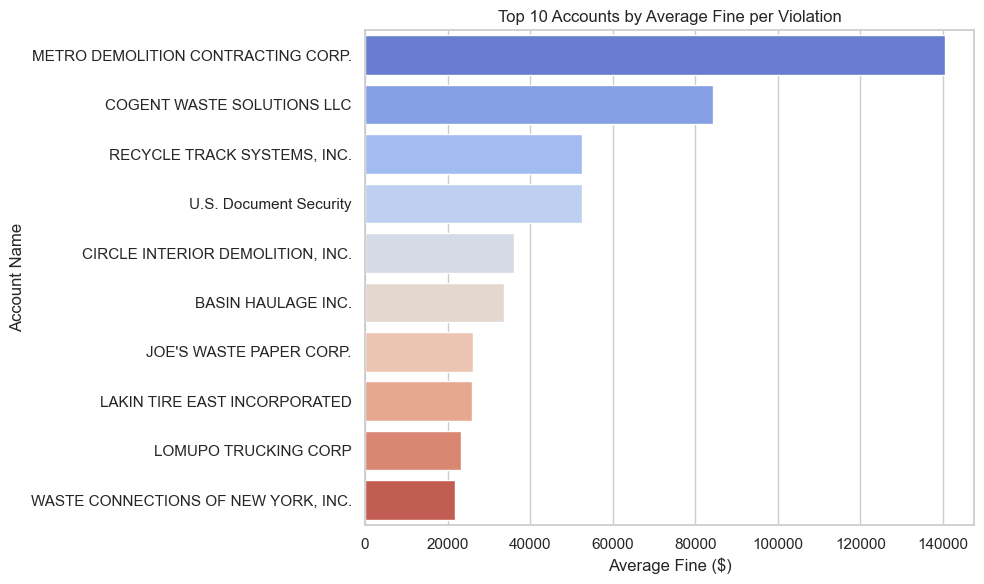

In [11]:
avg_fines = violations_df.groupby('ACCOUNT NAME').agg({
    'FINE AMOUNT': 'sum',
    'DESCRIPTION OF RULE': 'count'
}).rename(columns={'DESCRIPTION OF RULE': 'Violation Count'})

avg_fines['Avg Fine per Violation'] = avg_fines['FINE AMOUNT'] / avg_fines['Violation Count']
top_avg_fine = avg_fines.sort_values(by='Avg Fine per Violation', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_fine['Avg Fine per Violation'], y=top_avg_fine.index, palette='coolwarm')
plt.title("Top 10 Accounts by Average Fine per Violation")
plt.xlabel("Average Fine ($)")
plt.ylabel("Account Name")
plt.tight_layout()
plt.show()

## Complaints vs Violations per Account

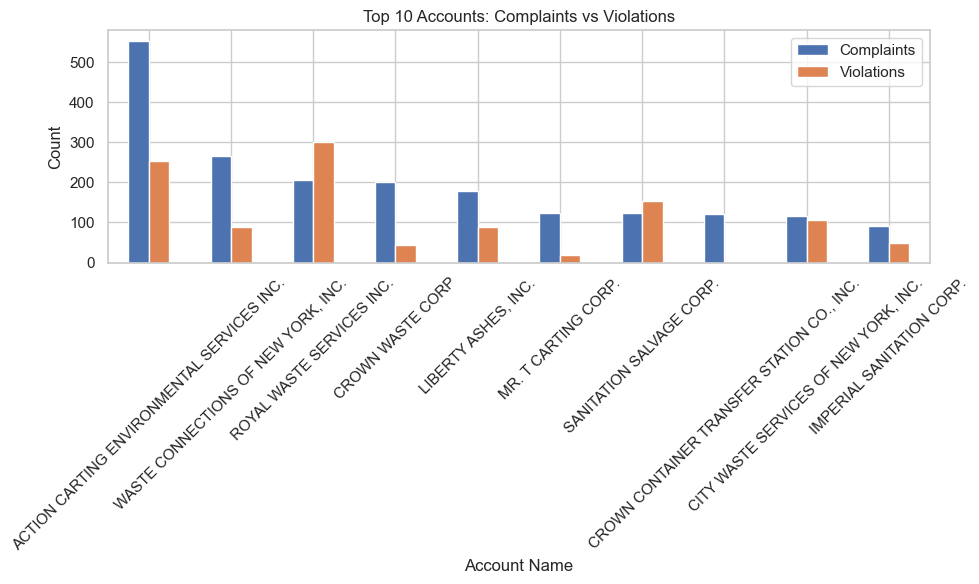

In [15]:
# Frequency per account
complaints_per_account = complaints_df['ACCOUNT NAME'].value_counts()
violations_per_account = violations_df['ACCOUNT NAME'].value_counts()

# Merge into one DataFrame
account_comparison = pd.DataFrame({
    'Complaints': complaints_per_account,
    'Violations': violations_per_account
}).fillna(0).astype(int)

# Plot top 10 accounts with most complaints
top_10 = account_comparison.sort_values(by='Complaints', ascending=False).head(10)

# Bar chart
top_10.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Accounts: Complaints vs Violations")
plt.xlabel("Account Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

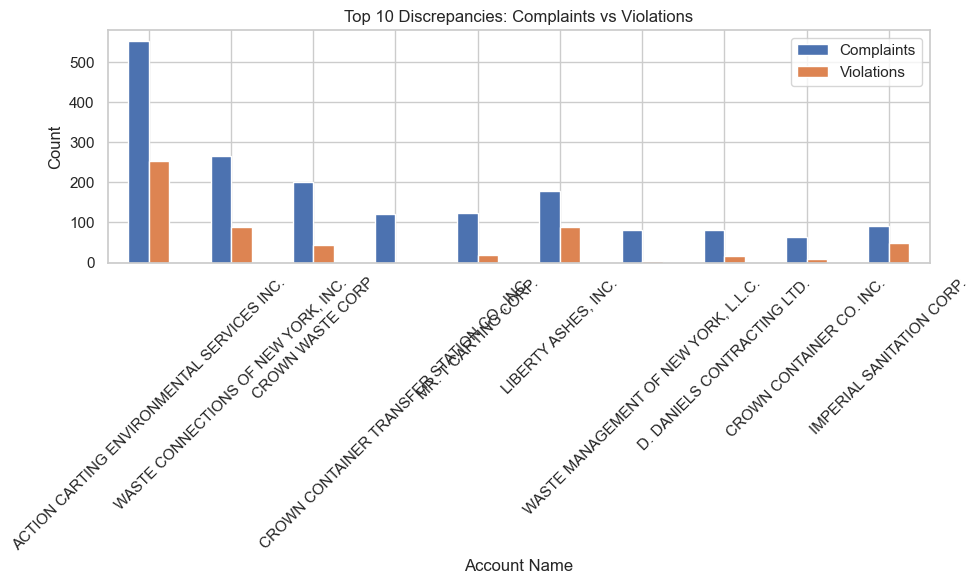

In [12]:
# Add a column for discrepancy
account_comparison['Discrepancy'] = account_comparison['Complaints'] - account_comparison['Violations']
biggest_discrepancies = account_comparison.sort_values(by='Discrepancy', ascending=False).head(10)

# Plot
biggest_discrepancies[['Complaints', 'Violations']].plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Discrepancies: Complaints vs Violations")
plt.xlabel("Account Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

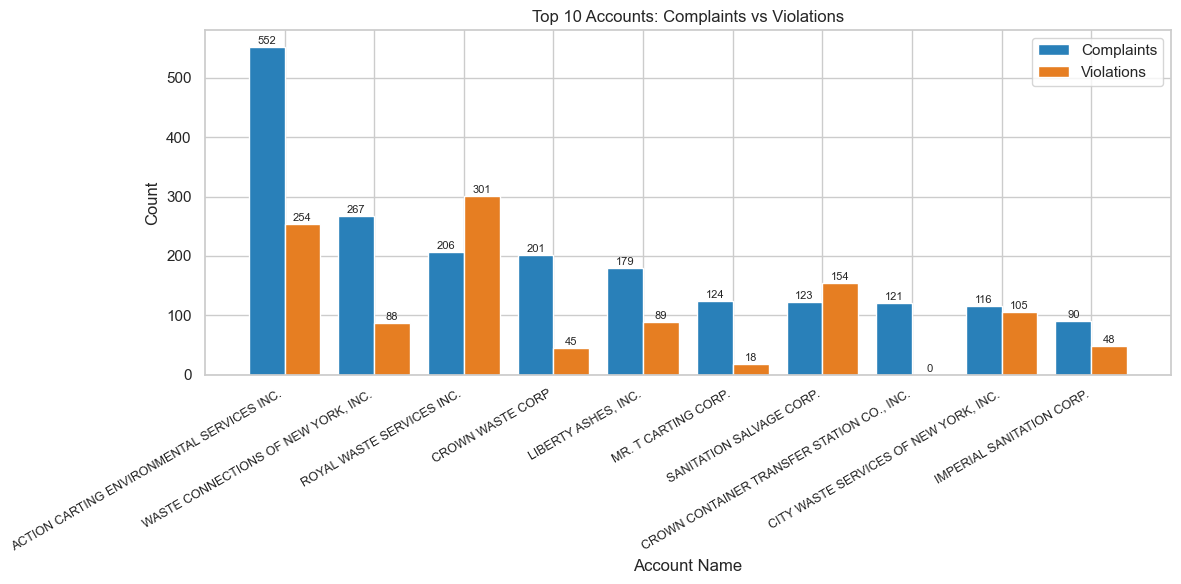

In [14]:
# Select top 10 accounts by complaints
top_10 = account_comparison.sort_values(by='Complaints', ascending=False).head(10)

# Create grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_10))

# Bars
plt.bar(x, top_10['Complaints'], width=bar_width, label='Complaints', color='#2980b9')
plt.bar([p + bar_width for p in x], top_10['Violations'], width=bar_width, label='Violations', color='#e67e22')

# X-axis labels
plt.xticks([p + bar_width / 2 for p in x], top_10.index, rotation=30, ha='right', fontsize=9)

# Add value labels
for i, val in enumerate(top_10['Complaints']):
    plt.text(i, val + 5, str(val), ha='center', fontsize=8)
for i, val in enumerate(top_10['Violations']):
    plt.text(i + bar_width, val + 5, str(val), ha='center', fontsize=8)

# Labels and title
plt.xlabel("Account Name")
plt.ylabel("Count")
plt.title("Top 10 Accounts: Complaints vs Violations")
plt.legend()
plt.tight_layout()
plt.show()

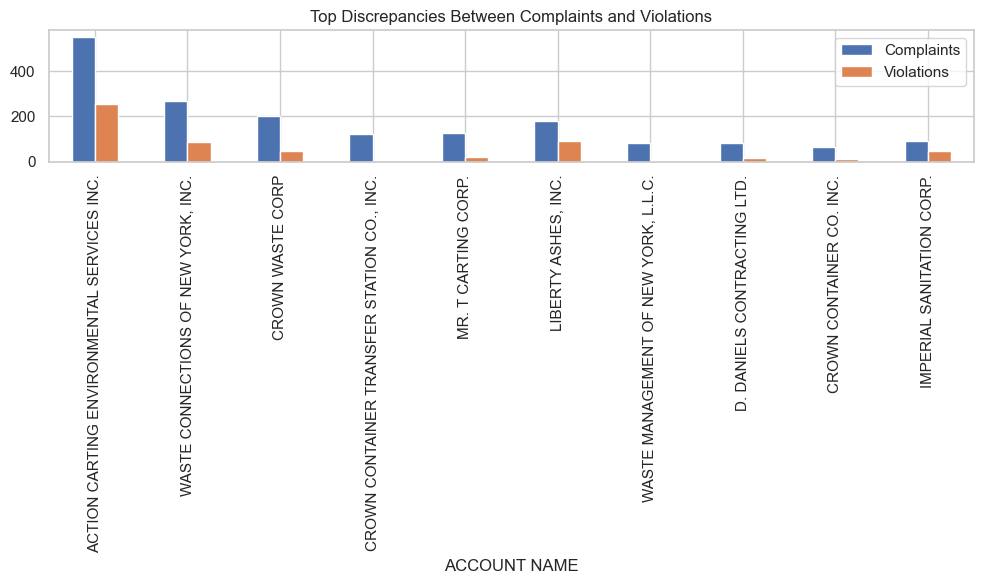

In [20]:
account_comparison['Discrepancy'] = account_comparison['Complaints'] - account_comparison['Violations']
top_discrepancies = account_comparison.sort_values(by='Discrepancy', ascending=False).head(10)

# Plot discrepancies
top_discrepancies[['Complaints', 'Violations']].plot(kind='bar', figsize=(10, 6))
plt.title("Top Discrepancies Between Complaints and Violations")
plt.tight_layout()
plt.show()

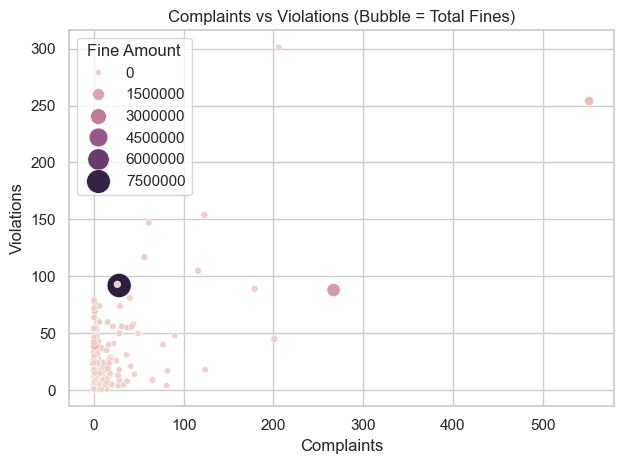

In [22]:
fine_sum = violations_df.groupby('ACCOUNT NAME')['FINE AMOUNT'].sum()
account_comparison['Fine Amount'] = account_comparison.index.map(fine_sum)

sns.scatterplot(data=account_comparison, x='Complaints', y='Violations',
                size='Fine Amount', hue='Fine Amount', sizes=(20, 300))
plt.title("Complaints vs Violations (Bubble = Total Fines)")
plt.tight_layout()